# Importing the Libraries

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

# Loading the Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


In [4]:
test

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH
...,...,...,...,...,...,...,...,...
1369,1369,Niladri Sekhar Dana,BANKURA,BJP,0,1 Crore+,0,WEST BENGAL
1370,1370,Mukesh Kumar Pal,PALLAHARA,BJD,1,0,13 Lac+,ODISHA
1371,1371,Vijay Shanker Dubey,MAHARAJGANJ,INC,1,5 Crore+,0,BIHAR
1372,1372,Satpal Singh Satti,UNA,BJP,1,2 Crore+,5 Lac+,HIMACHAL PRADESH


# Data Visualization

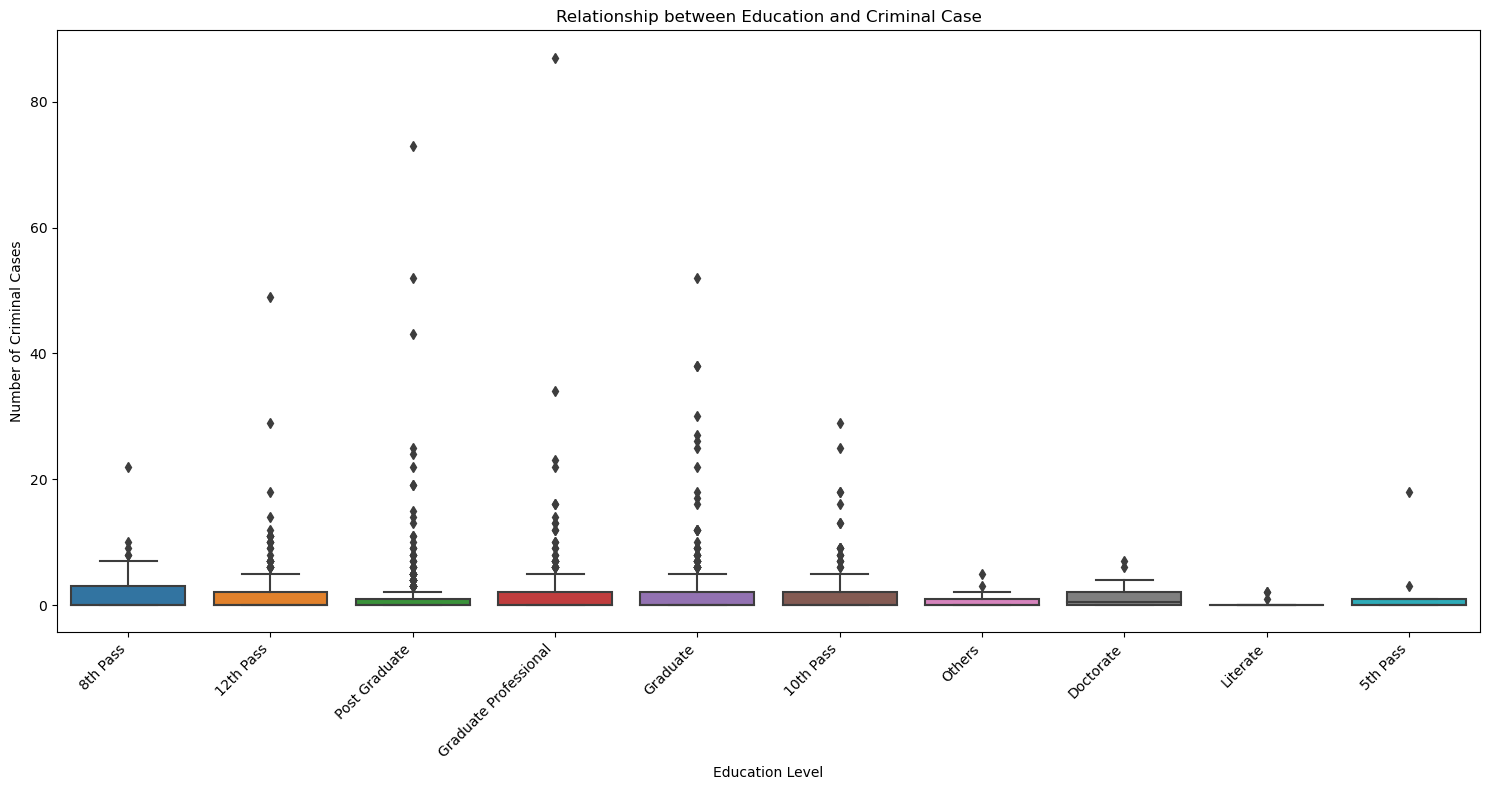

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between Education and Criminal Case with rotated x-axis labels
plt.figure(figsize=(15, 8))
sns.boxplot(x='Education', y='Criminal Case', data=train)
plt.title('Relationship between Education and Criminal Case')
plt.xlabel('Education Level')
plt.ylabel('Number of Criminal Cases')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align to the right

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


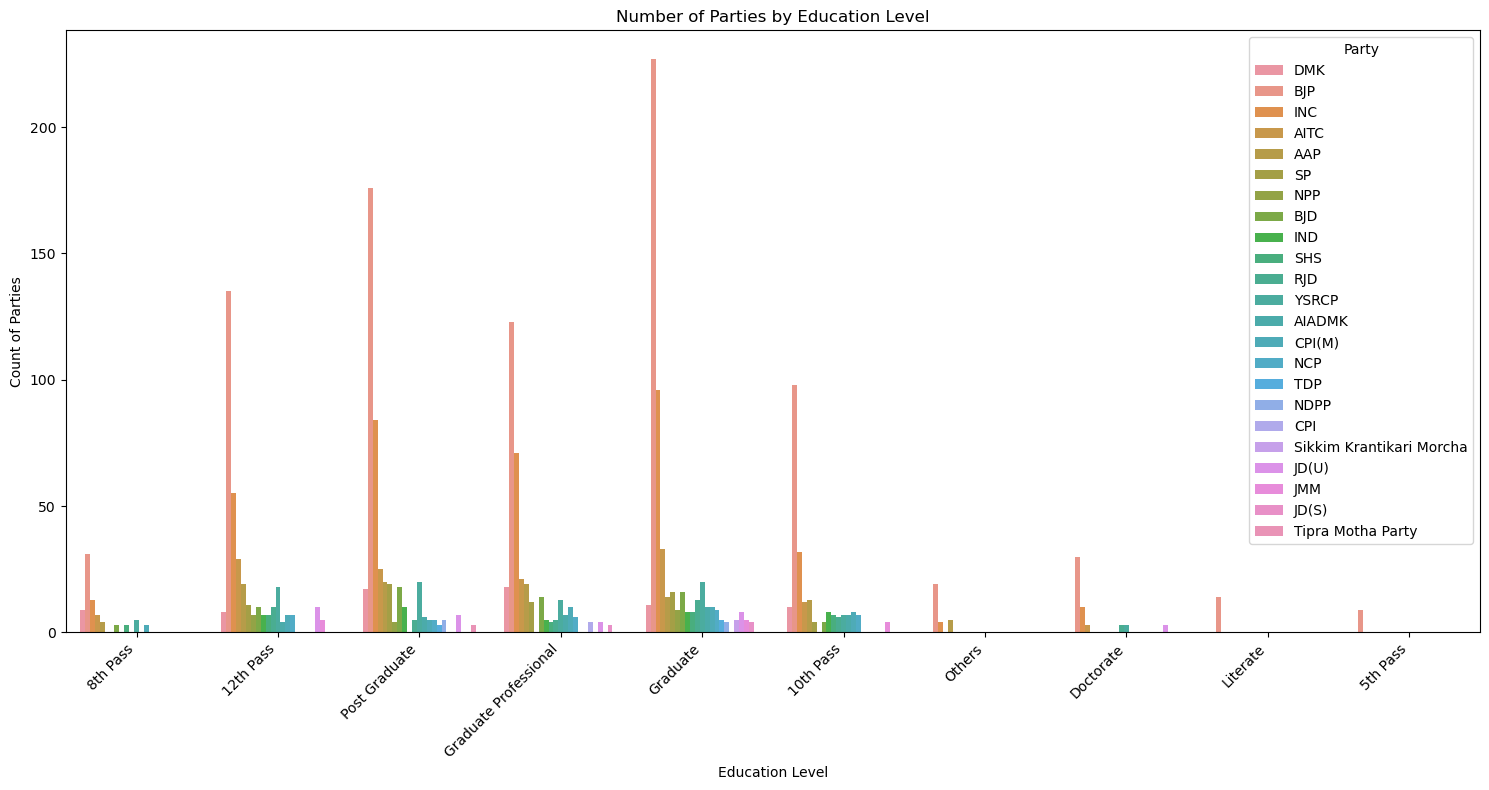

In [6]:
# Plot the count of parties for each education level
plt.figure(figsize=(15, 8))
sns.countplot(x='Education', hue='Party', data=train)
plt.title('Number of Parties by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count of Parties')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


# Data Preprocessing

In [7]:
train.drop(columns=['ID','Candidate','Constituency ∇'], inplace=True)
test.drop(columns=['ID','Candidate','Constituency ∇'], inplace=True)

In [8]:
def convert_to_lakhs(value):
    value = str(value)
    if value == "0":
        return 0
    elif 'Crore+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))
        return int(number * 100)
    elif 'Lac+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))
        return int(number)
    elif 'Thou+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))
        return int(number / 100)
    elif 'Hund+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))
        return int(number / 1000)
    else:
        return int(value)

In [9]:
train["Total Assets"] = train["Total Assets"].apply(convert_to_lakhs)
train["Liabilities"] = train["Liabilities"].apply(convert_to_lakhs)
test["Total Assets"] = test["Total Assets"].apply(convert_to_lakhs)
test["Liabilities"] = test["Liabilities"].apply(convert_to_lakhs)

C:\Users\tanus\AppData\Local\Temp\ipykernel_38832\3071063061.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education', y=train['Total Assets'] - train['Liabilities'], data=train, ci=None)  # Calculate the difference on-the-fly


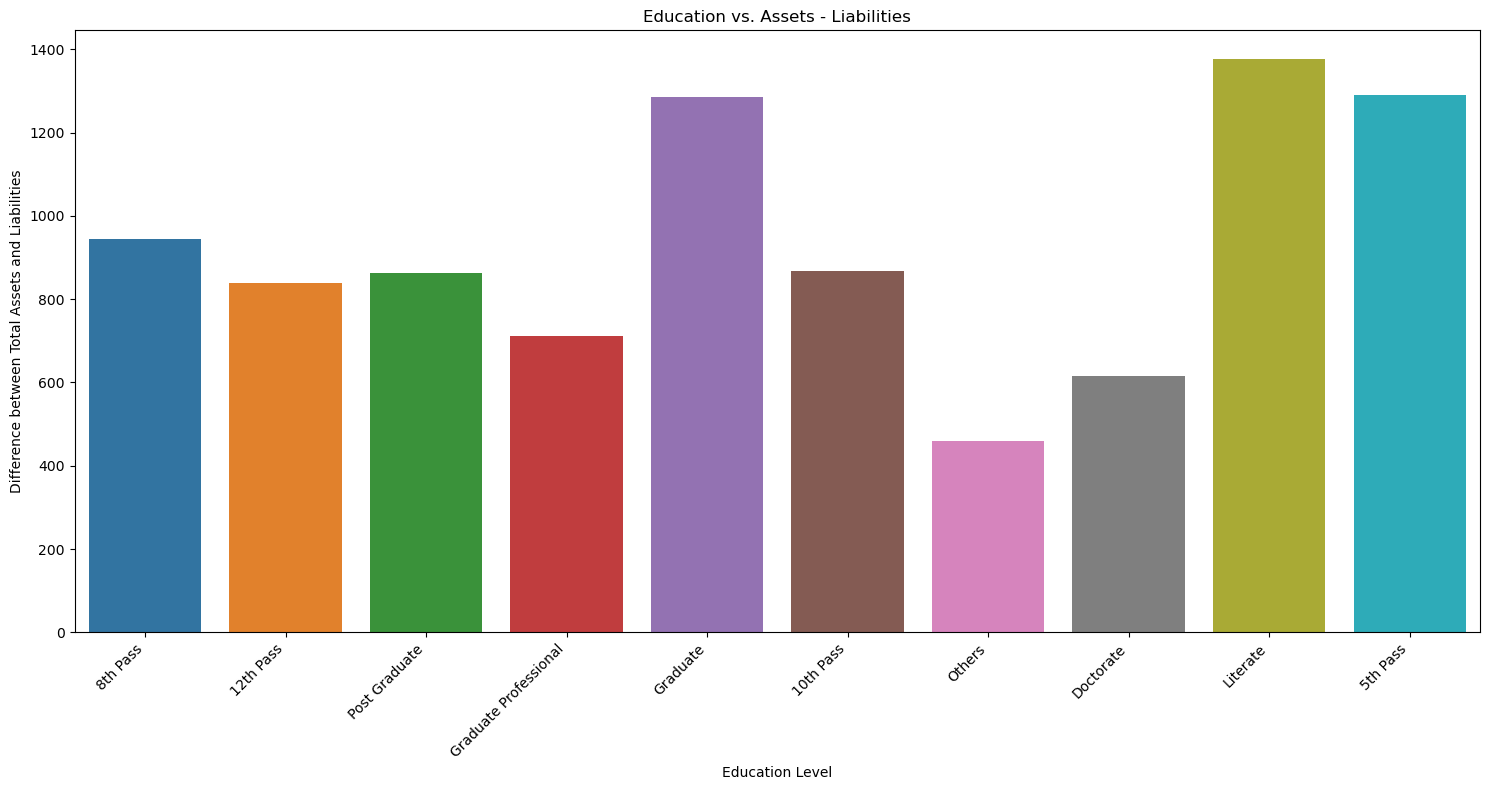

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a graph of education vs. the difference between assets and liabilities
plt.figure(figsize=(15, 8))
sns.barplot(x='Education', y=train['Total Assets'] - train['Liabilities'], data=train, ci=None)  # Calculate the difference on-the-fly
plt.title('Education vs. Assets - Liabilities')
plt.xlabel('Education Level')
plt.ylabel('Difference between Total Assets and Liabilities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
train['Education'] = label_encoder.fit_transform(train['Education'])

# train['Education'] = train['Education'].astype('category').cat.codes

train = pd.get_dummies(train, columns=['Party','state',])
test = pd.get_dummies(test, columns=['Party','state'])
train

,Criminal Case,Total Assets,Liabilities,Education,Party_AAP,Party_AIADMK,Party_AITC,Party_BJD,Party_BJP,Party_CPI,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,4,21100,200,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,100,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,700,22,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,900,24,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,200,61,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,1,61,10,6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2055,0,200,8,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2056,0,1300,85,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2057,1,2500,94,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test

,Criminal Case,Total Assets,Liabilities,Party_AAP,Party_AIADMK,Party_AITC,Party_BJD,Party_BJP,Party_CPI,Party_CPI(M),...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,2,7000,1100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,200,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,4900,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,200,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1600,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,0,100,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1370,1,0,13,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1371,1,500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1,200,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Loading the Model


In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold

# Assuming 'train' is your original trainFrame
X = train.drop(columns=['Education'])
y = train['Education']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
bernoulli_nb = BernoulliNB(
    alpha=1,
    binarize=0.0,
    fit_prior=True,
    class_prior=None
)
bernoulli_nb.fit(X, y)

predictions = bernoulli_nb.predict(test)
predictions = label_encoder.inverse_transform(predictions)
predictions

array(['10th Pass', '12th Pass', 'Graduate', ..., 'Graduate', 'Graduate',
       'Post Graduate'], dtype=object)

# Generating the DataFrame

In [15]:
a=pd.DataFrame(columns=['ID','Education'])
a['ID']=range(0,len(predictions))
a['Education']=predictions
a.reset_index(drop=True, inplace=True)
a

,ID,Education
0,0,10th Pass
1,1,12th Pass
2,2,Graduate
3,3,12th Pass
4,4,Post Graduate
...,...,...
1369,1369,Post Graduate
1370,1370,Graduate Professional
1371,1371,Graduate
1372,1372,Graduate


# Converting to CSV

In [18]:
a.to_csv(r'attempt8.csv',index=False)